In [1]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import matplotlib

In [31]:
# Define the ticker symbol
ticker_symbol = 'NVDA'

# Define the data range
end = datetime(2023, 12, 31)
start = datetime(2023, 1, 1)

# Use yfinance to fetch the data
df = yf.download(ticker_symbol, start=start, end=end,auto_adjust=False, actions=False)

[*********************100%%**********************]  1 of 1 completed


In [32]:
df.keys()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [33]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,148.509995,149.960007,140.960007,143.149994,143.086502,40127700
2023-01-04,145.669998,148.529999,142.410004,147.490005,147.424606,43132400
2023-01-05,144.910004,145.639999,141.479996,142.649994,142.586731,38916800
2023-01-06,144.740005,150.100006,140.339996,148.589996,148.524094,40504400
2023-01-09,152.839996,160.559998,151.410004,156.279999,156.210678,50423100


In [34]:
df['MA10'] = df['Close'].rolling(10).mean() #ten day moving average

In [35]:
df['MA20'] = df['Close'].rolling(20).mean() #twenty day moving average

In [36]:
df['MA50'] = df['Close'].rolling(50).mean() #fifty day moving average

In [37]:
df['Daily Return'] = df['Close'].pct_change()

In [38]:
df['Intraday Return'] = (df['Close'] - df['Open']) / df['Open']

In [39]:
df = df.reset_index()

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

In [41]:
df['Month'] = df['Date'].dt.month

In [42]:
df['Day'] = df['Date'].dt.day

In [43]:
df = df.drop('Date',axis = 1)

In [44]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA50,Daily Return,Intraday Return,Month,Day
0,148.509995,149.960007,140.960007,143.149994,143.086502,40127700,NaN,NaN,NaN,NaN,-0.036092,1,3
1,145.669998,148.529999,142.410004,147.490005,147.424606,43132400,NaN,NaN,NaN,0.030318,0.012494,1,4
2,144.910004,145.639999,141.479996,142.649994,142.586731,38916800,NaN,NaN,NaN,-0.032816,-0.015596,1,5
3,144.740005,150.100006,140.339996,148.589996,148.524094,40504400,NaN,NaN,NaN,0.041640,0.026599,1,6
4,152.839996,160.559998,151.410004,156.279999,156.210678,50423100,NaN,NaN,NaN,0.051753,0.022507,1,9


In [65]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA50,Daily Return,Intraday Return,Month,Day
245,491.950012,493.829987,484.670013,488.299988,488.299988,25213900,485.223996,477.321498,462.838599,-0.003266,-0.007420,12,22
246,489.679993,496.000000,489.600006,492.790009,492.790009,24420000,487.875998,477.839998,463.602200,0.009195,0.006351,12,26
247,495.109985,496.799988,490.850006,494.170013,494.170013,23364800,489.635999,478.637999,464.266600,0.002800,-0.001899,12,27
248,496.429993,498.839996,494.119995,495.220001,495.220001,24658700,491.069998,479.328999,465.383400,0.002125,-0.002437,12,28
249,498.130005,499.970001,487.510010,495.220001,495.220001,38869000,492.241998,480.704999,466.848600,0.000000,-0.005842,12,29


In [51]:
df.iloc[:,4:].corr()

,Adj Close,Volume,MA10,MA20,MA50,Daily Return,Intraday Return,Month,Day
Adj Close,1.000000,-0.021094,0.986566,0.971074,0.914051,-0.085655,-0.151892,0.924233,0.090003
Volume,-0.021094,1.000000,-0.101263,-0.104362,-0.048643,0.319430,-0.036776,-0.146820,0.206969
MA10,0.986566,-0.101263,1.000000,0.992004,0.947322,-0.136672,-0.185546,0.927642,0.028462
MA20,0.971074,-0.104362,0.992004,1.000000,0.973758,-0.121960,-0.139896,0.929150,0.097564
MA50,0.914051,-0.048643,0.947322,0.973758,1.000000,-0.116032,-0.091905,0.932760,-0.009062
Daily Return,-0.085655,0.319430,-0.136672,-0.121960,-0.116032,1.000000,0.675442,-0.129281,0.010932
Intraday Return,-0.151892,-0.036776,-0.185546,-0.139896,-0.091905,0.675442,1.000000,-0.153105,-0.095995
Month,0.924233,-0.146820,0.927642,0.929150,0.932760,-0.129281,-0.153105,1.000000,-0.001248
Day,0.090003,0.206969,0.028462,0.097564,-0.009062,0.010932,-0.095995,-0.001248,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             250 non-null    float64
 1   High             250 non-null    float64
 2   Low              250 non-null    float64
 3   Close            250 non-null    float64
 4   Adj Close        250 non-null    float64
 5   Volume           250 non-null    int64  
 6   MA10             241 non-null    float64
 7   MA20             231 non-null    float64
 8   MA50             201 non-null    float64
 9   Daily Return     249 non-null    float64
 10  Intraday Return  250 non-null    float64
 11  Month            250 non-null    int32  
 12  Day              250 non-null    int32  
dtypes: float64(10), int32(2), int64(1)
memory usage: 23.6 KB


In [47]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA50,Daily Return,Intraday Return,Month,Day
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02,241.000000,231.000000,201.000000,249.000000,250.000000,250.000000,250.000000
mean,365.151680,371.231319,359.265399,365.692600,365.628617,4.734821e+07,367.346137,369.062836,373.475771,0.005440,0.002944,6.536000,15.816000
std,108.491269,109.169134,106.577841,107.564551,107.579567,1.614098e+07,103.159816,98.834319,87.690748,0.030526,0.022299,3.428077,8.768219
min,144.740005,145.639999,140.339996,142.649994,142.586731,1.982090e+07,156.837999,172.732998,204.571799,-0.059072,-0.060797,1.000000,1.000000
25%,268.310005,271.710007,264.284988,268.997498,268.923866,3.790238e+07,270.982001,271.327250,280.216400,-0.013069,-0.011389,4.000000,8.000000
50%,416.354996,425.029999,409.625000,418.934998,418.880936,4.336650e+07,421.528003,431.029999,428.310800,0.004315,0.002877,7.000000,16.000000
75%,457.707504,462.232498,449.882507,456.462494,456.394135,5.172652e+07,453.800998,449.410252,448.648602,0.021308,0.016454,9.750000,23.000000
max,502.160004,505.480011,494.119995,504.089996,504.045685,1.543911e+08,492.241998,480.704999,466.848600,0.243696,0.080695,12.000000,31.000000


In [48]:
df.to_excel("data.xlsx")

Text(0, 0.5, 'USD')

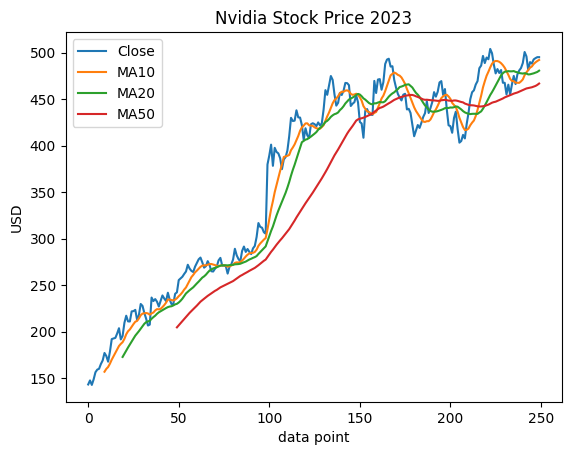

In [55]:
graph = df[['Close','MA10','MA20','MA50']].plot(title = 'Nvidia Stock Price 2023')
graph.set_xlabel('data point')
graph.set_ylabel('USD')

Text(0, 0.5, 'Volume')

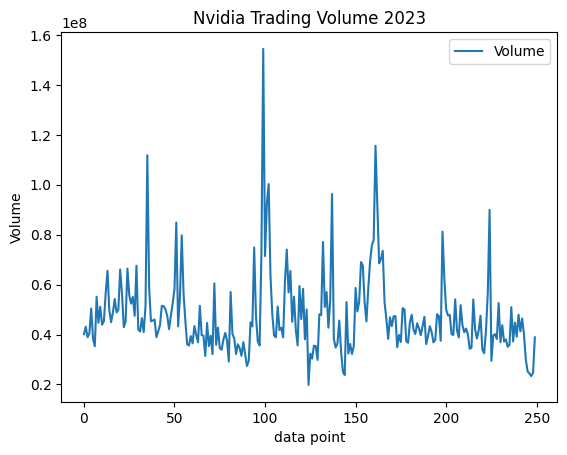

In [64]:
graph = df[['Volume']].plot(title = 'Nvidia Trading Volume 2023')
graph.set_xlabel('data point')
graph.set_ylabel('Volume')

In [61]:
df.iloc[80:131]

,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,MA50,Daily Return,Intraday Return,Month,Day
80,272.250000,277.579987,270.709991,277.489990,277.414032,29168700,272.037003,271.807001,254.354800,0.019210,0.019247,4,28
81,278.399994,290.579987,277.799988,289.100006,289.020874,57032900,273.945004,272.373502,255.736400,0.041839,0.038434,5,1
82,286.799988,288.359985,280.829987,282.100006,282.022797,40273000,274.488004,272.496002,257.100800,-0.024213,-0.016388,5,2
83,278.399994,283.670013,274.720001,278.019989,277.943878,38338700,274.359003,272.670502,258.530200,-0.014463,-0.001365,5,3
84,276.510010,278.589996,272.399994,275.619995,275.544556,32185000,274.817001,273.011002,259.891800,-0.008632,-0.003219,5,4
85,278.260010,287.549988,277.309998,286.799988,286.721497,36101400,276.378000,273.832501,260.894999,0.040563,0.030691,5,5
86,285.220001,292.200012,283.500000,291.510010,291.430206,34497900,278.487000,274.618501,262.068000,0.016423,0.022053,5,8
87,288.989990,289.730011,284.500000,285.709991,285.631775,31486900,280.816998,275.319501,263.082000,-0.019896,-0.011350,5,9
88,290.049988,291.130005,284.609985,288.850006,288.770935,36935000,282.745999,276.514500,264.215800,0.010990,-0.004137,5,10
89,288.959991,289.500000,282.459991,285.779999,285.701782,32214900,284.097998,277.572000,265.391800,-0.010628,-0.011005,5,11


1. Obviouly, the stock price kept rising in 2023.
2. As the result, the price has high correlation to Month but we can understand that it carries no meaning.
3. In most of the time, if MA10 is higher than MA20, the stock price tends to raise, vice versa.
4. A drastic increment was found from the 24th May to 30th May at the same time when ChatGPT was released.
5. At the same period, Nvidia stock has a peak of Trading Volume. Which matches to point 3.